# Peak width vs mass

In [1]:
from matplotlib import pyplot as plt
import scipy as sc
import pandas as pd
import numpy as np
from pathlib import Path
from scipy.optimize import curve_fit

#absolute path of repo root
rel_path = Path("/home/ben/Documents/Repos/382L_NMRLab/data/Feb 09/echowidth_glycerin_sample_size/2_743")

In [15]:
def fit_echo(fname, avg_start, avg_stop, guess = [4, .02,.0008]):
    FIDData = pd.read_csv(rel_path / fname, header = None)

    chan1 = FIDData[1].values
    chan2 = FIDData[2].values
    tlist = FIDData[0].values

    plt.plot(tlist, chan1)
    plt.plot(tlist, chan2)

    avg_window = slice(avg_start, avg_stop)

    plt.axvspan(min(tlist[avg_window]), max(tlist[avg_window]), color = "tab:red", alpha = .5)

    plt.show()

    chan1 = np.subtract(chan1, np.mean(chan1[avg_window]))
    chan2 = np.subtract(chan2, np.mean(chan2[avg_window]))

    trans_mag = np.sqrt(np.square(chan1) + np.square(chan2))
    stdev = max(trans_mag[avg_window]) - min(trans_mag[avg_window])

    def gaussian_fit(t, A, mu, T2):
        return A*np.exp(-(t-mu)**2/(2*T2**2))

    popt, pcov = curve_fit(gaussian_fit, tlist, trans_mag, p0 = guess, sigma = [stdev for y in tlist])

    plt.plot(tlist,trans_mag, color = "tab:red", alpha = .5, label = "Data")
    plt.plot(tlist, [gaussian_fit(t, *popt) for t in tlist], linewidth = 1, label = r"$e^{-(t-2\tau)^2/(2T_2^\ast)^2}$")
    plt.xlabel(r"$t$ (s)", fontsize = 14)
    plt.ylabel(r"$M_\perp$ (V)", fontsize = 14)
    plt.gcf().set_dpi(200)
    plt.legend()
    plt.show()
    return popt[2], np.trace(pcov)

In [16]:
T2s = []
errs = []

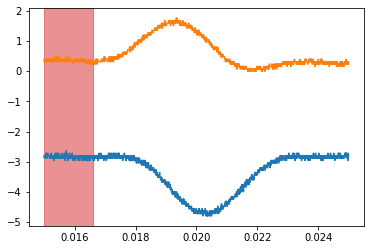

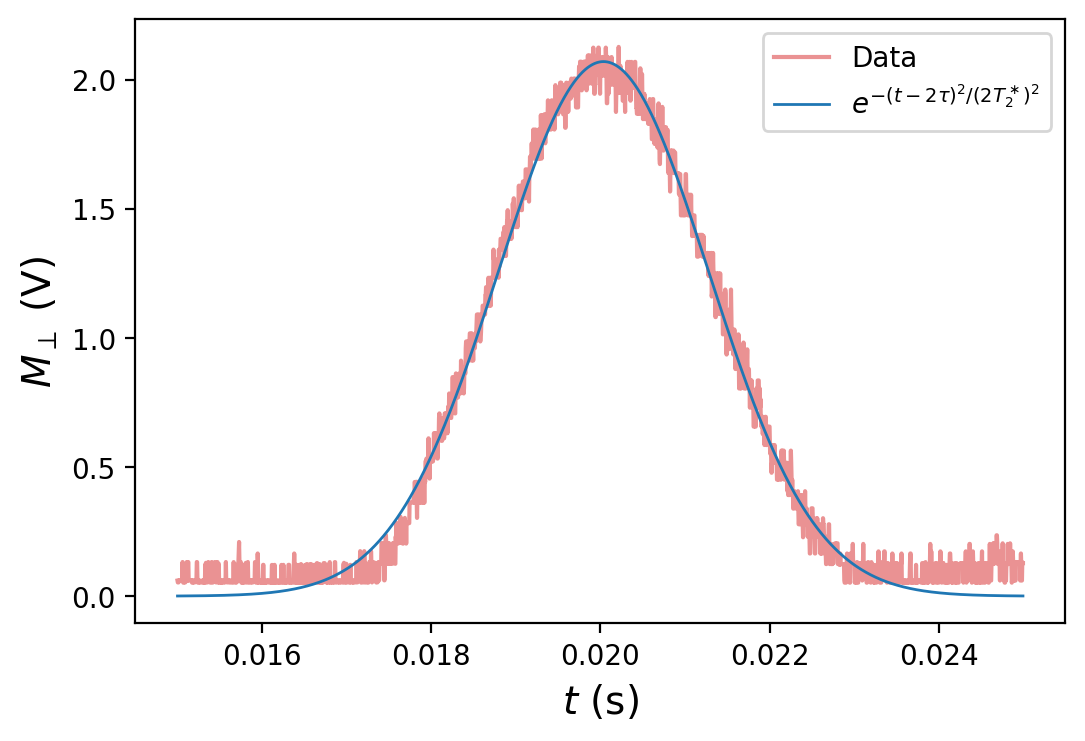

In [17]:
T2, err = fit_echo("0_29.csv", 0, 400)
T2s.append(T2)
errs.append(err)

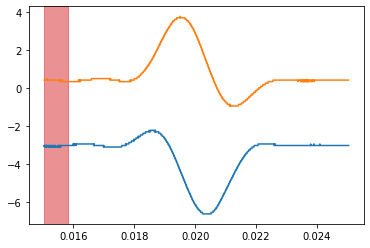

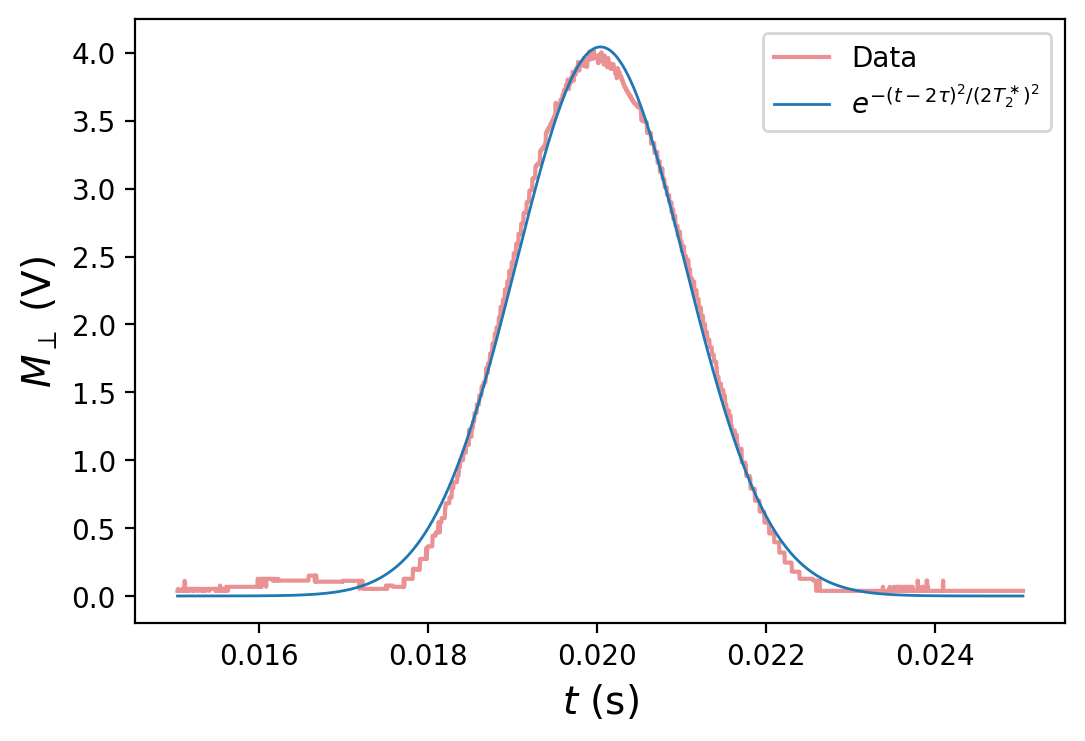

In [18]:
T2, err = fit_echo("0_57.csv", 0, 200)

T2s.append(T2)
errs.append(err)

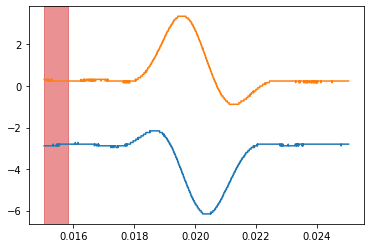

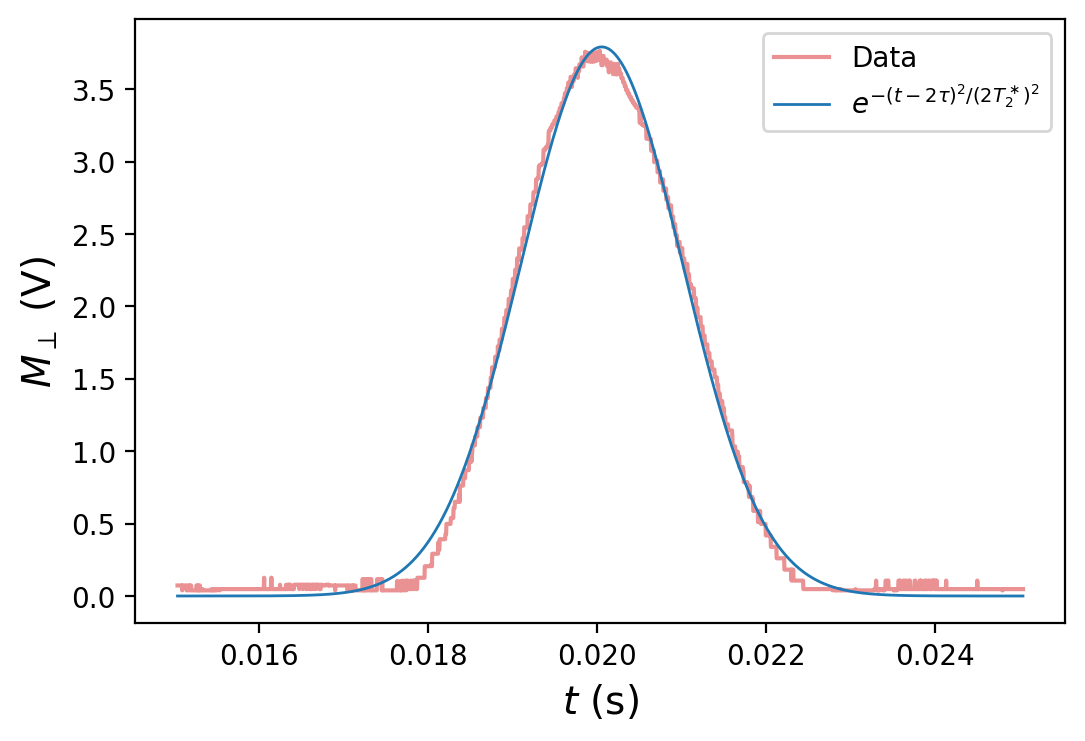

In [19]:
T2, err = fit_echo("0_83.csv", 0, 200)

T2s.append(T2)
errs.append(err)

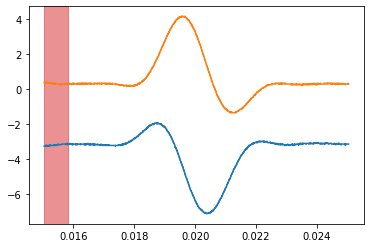

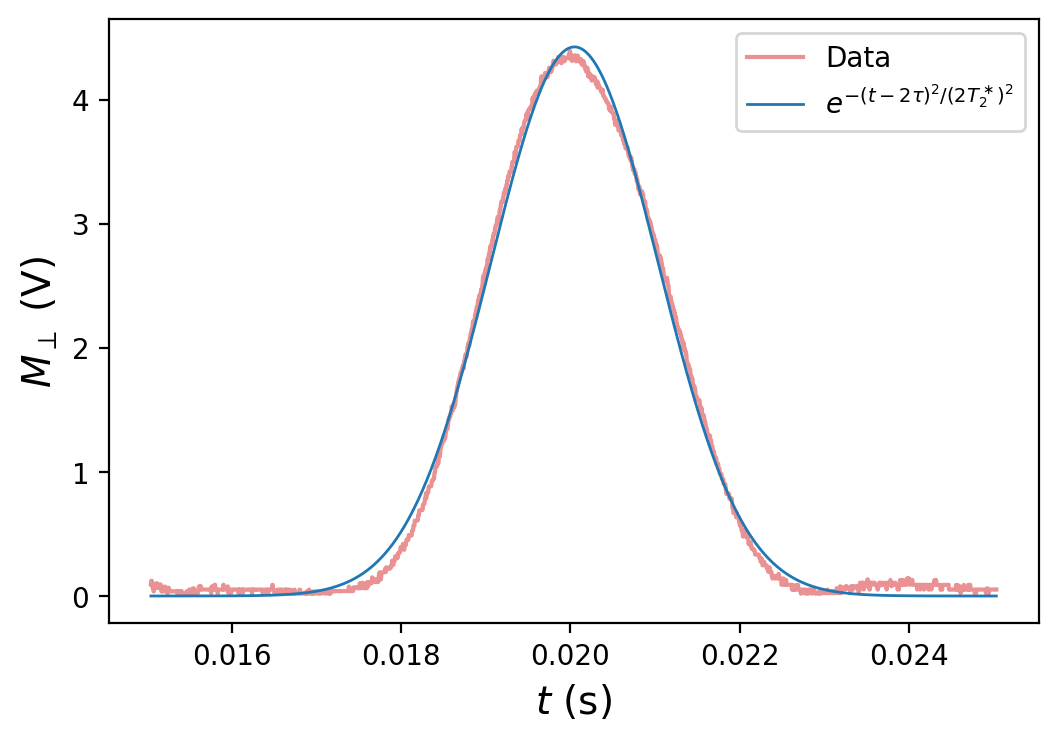

In [20]:
T2, err = fit_echo("1_01.csv", 0, 200)
T2s.append(T2)
errs.append(err)

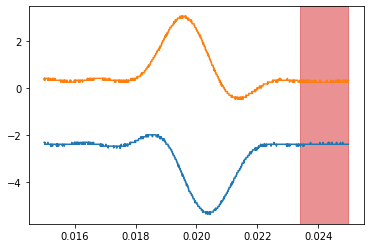

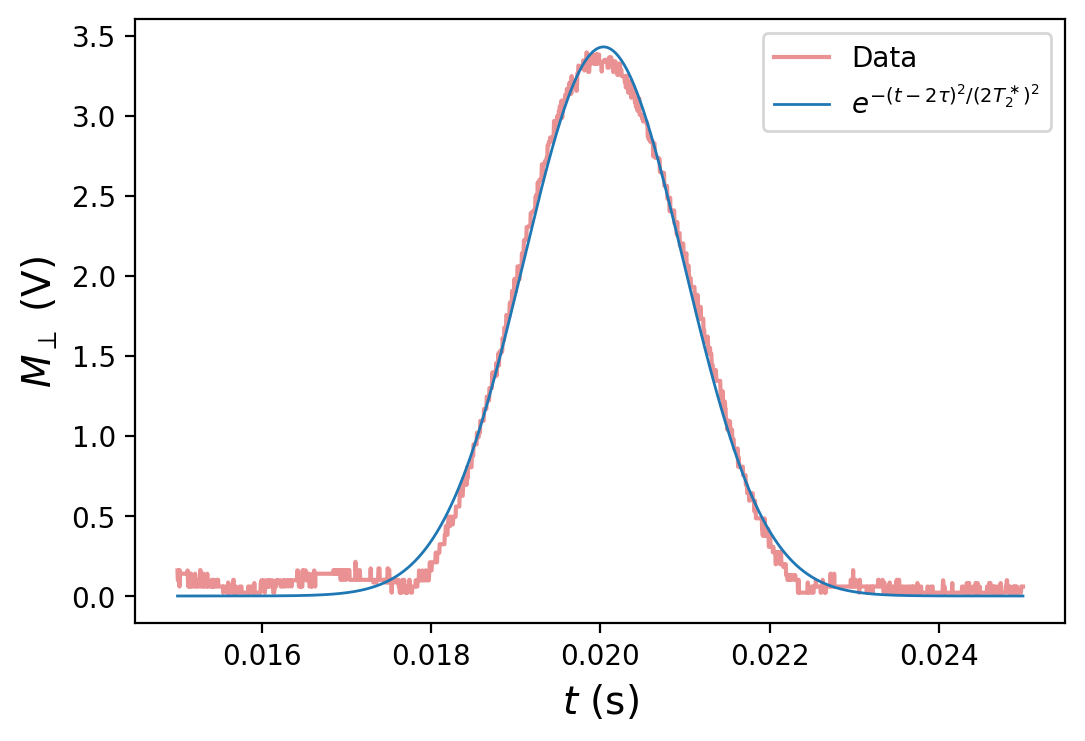

In [21]:
T2, err = fit_echo("1_27.csv", 2100, -1)

T2s.append(T2)
errs.append(err)

In [22]:
T2s

[0.0012443972325110809,
 0.000996790262252001,
 0.0009532639754333467,
 0.0009898987816005002,
 0.0009496512682253806]

In [23]:
def invfit(x, a, b):
    return a/x+b

In [24]:
popt, pcov = curve_fit(invfit,[.29, .57, .83, 1.01, 1.27], T2s, p0 = [.0003, .0008])

In [25]:
(T2s[-1]-T2s[0])/(1.27-.29)

-0.0003007611880466329

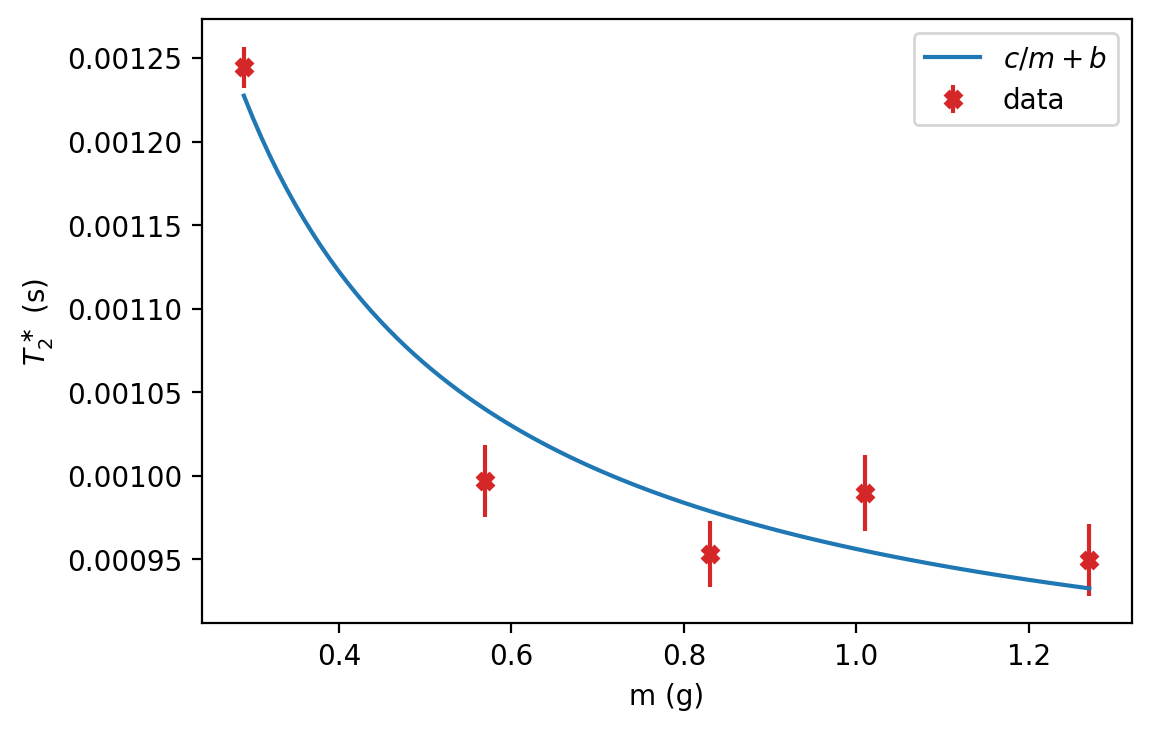

In [26]:
plt.errorbar([.29,.57,.83,1.01,1.27], T2s, yerr = errs, linestyle = "None", color = "tab:red", marker = "X", label = "data")
xlist = np.linspace(.29,1.27, 100)
plt.plot(xlist, [invfit(x, *popt) for x in xlist], label = r"$c/m + b$")
#plt.plot(xlist, [invfit(x, .6*popt[1],0) for x in xlist], label = r"$c/m$")
plt.xlabel("m (g)")
plt.ylabel(r"$T_2^\ast$ (s)")
plt.legend()
plt.gcf().set_dpi(200)

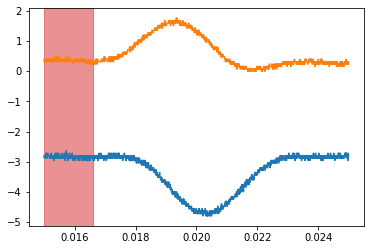

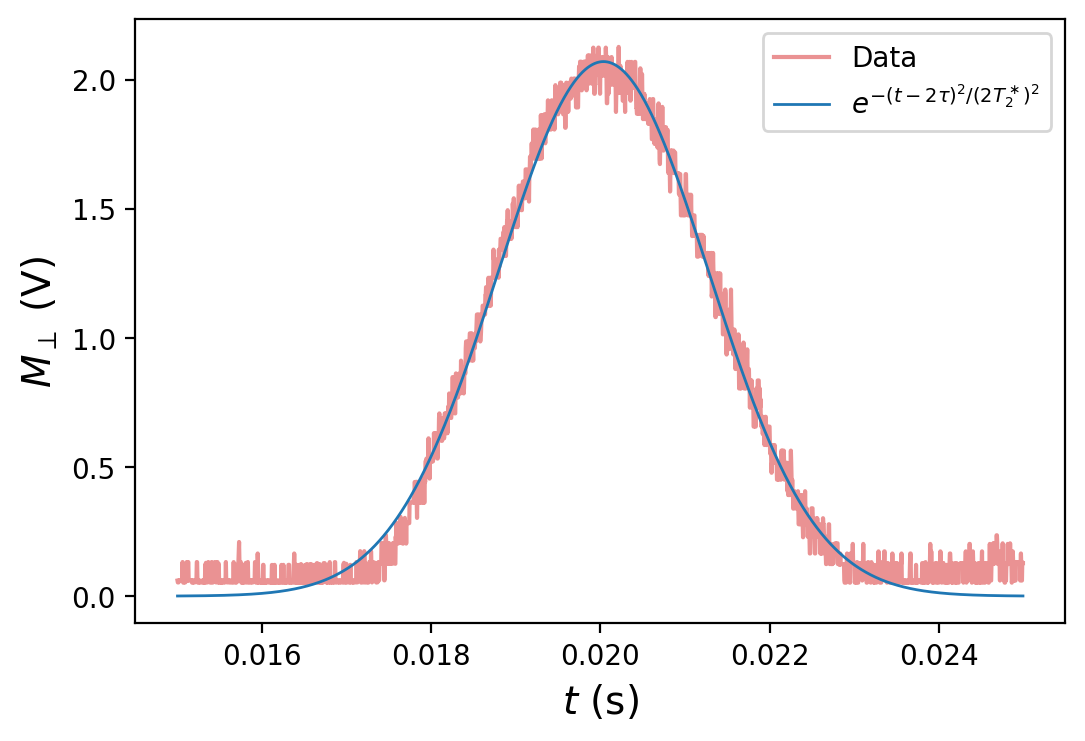

ValueError: not enough values to unpack (expected 3, got 2)

In [14]:
tlist, tmag, popt = fit_echo("0_29.csv", 0, 400);
plt.plot(tlist, tmag/popt[0])
tlist, tmag, popt = fit_echo("0_57.csv", 0, 200);
plt.plot(tlist, tmag/popt[0])

tlist, tmag, popt = fit_echo("0_83.csv", 0, 200);
plt.plot(tlist, tmag/popt[0])
tlist, tmag, popt = fit_echo("1_01.csv", 0, 200);
plt.plot(tlist, tmag/popt[0])
tlist, tmag, popt = fit_echo("1_27.csv", 2100, -1);
plt.plot(tlist, tmag/popt[0])

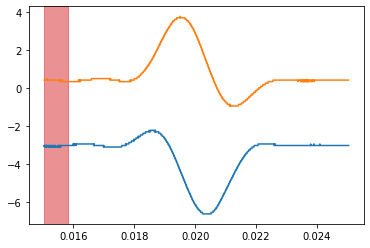

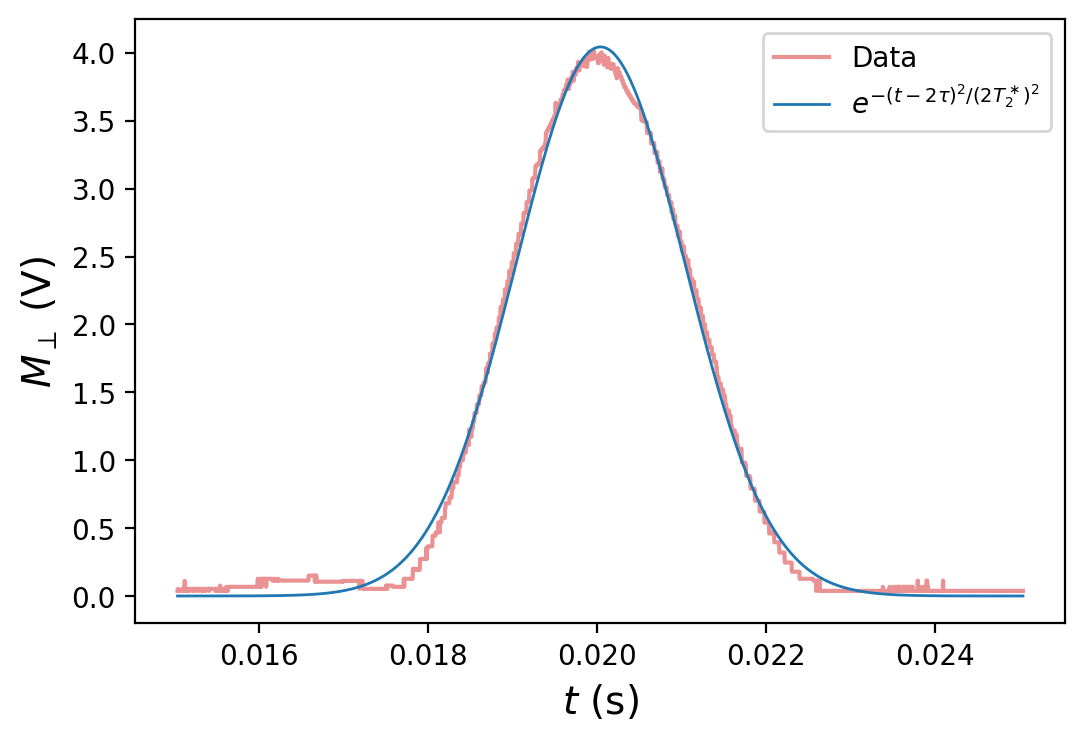

In [ ]:
fit_echo("0_57.csv", 0, 200);
